# Thématique 5 - Analyse multivariée et analyse en composantes principales

### Importation des librairies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data pre-processing

In [2]:
# File pre-processing
filepath = "../data"
filename = "PoissonsData.csv"
file = os.path.join(filepath, filename)

# Reading data
df_original = pd.read_csv(file, delimiter=";")
df = df_original.copy()

# Data display
df.describe()

,OEIL,BRAN,OPER,NAGE,FOIE,TUDI,REINS,ECAI,MUSC,Poids,Long,Lng,Tete,Larg,Muse,DOeil
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,15.434783,91.565217,109.130435,164.869565,27.217391,281.608696,9.086957,289.043478,3.304348,82.086957,190.478261,170.695652,42.782609,39.434783,13.565217,9.739130
std,7.506519,54.945284,73.837847,89.000666,16.467479,259.088391,3.189657,213.382814,2.803160,26.352355,17.900913,15.688545,4.804889,4.510856,2.537466,0.963771
min,6.000000,20.000000,36.000000,66.000000,7.000000,76.000000,4.000000,90.000000,1.000000,47.000000,164.000000,147.000000,36.000000,31.000000,9.000000,8.000000
25%,9.500000,48.500000,64.000000,103.500000,16.000000,108.000000,8.000000,149.000000,2.000000,61.000000,176.000000,160.000000,39.500000,36.000000,12.000000,9.000000
50%,14.000000,79.000000,76.000000,132.000000,22.000000,192.000000,9.000000,197.000000,2.000000,79.000000,189.000000,168.000000,42.000000,39.000000,13.000000,10.000000
75%,21.500000,116.500000,141.000000,213.000000,35.000000,314.000000,10.000000,354.500000,4.000000,89.000000,202.000000,177.500000,45.500000,43.000000,15.500000,10.500000
max,32.000000,224.000000,260.000000,350.000000,73.000000,1031.000000,17.000000,809.000000,11.000000,133.000000,225.000000,199.000000,54.000000,48.000000,18.000000,11.000000


24 poissons ont été placés dans trois aquariums, A1, A2 et A3, tous contaminés par la radioactivité de la même manière mais avec des temps d'exposition différents. Le poisson 17 est mort au cours de l'expérience et n'apparaît pas dans le tableau.

On cherche à savoir si le temps d'exposition à la radioactivité influe sur la taille des poissons.

Le poids moyen d'un poisson est de 82 kg. Le plus léger pèse 47 kg et le plus lourd 133 kg.

In [3]:
df.head()

,OEIL,BRAN,OPER,NAGE,FOIE,TUDI,REINS,ECAI,MUSC,Poids,Long,Lng,Tete,Larg,Muse,DOeil,AQUA
1,10,65,65,107,7,76,16,142,1,132,214,197,54,47,18,11,A1
2,9,33,39,67,29,113,10,99,2,122,220,198,49,44,16,10,A1
3,6,47,71,95,11,192,9,121,2,129,220,198,49,45,17,11,A1
4,7,70,40,66,8,310,10,90,2,133,225,199,52,48,15,11,A1
5,8,59,67,100,14,289,4,244,1,57,168,149,37,37,9,9,A1


In [4]:
df.tail()

,OEIL,BRAN,OPER,NAGE,FOIE,TUDI,REINS,ECAI,MUSC,Poids,Long,Lng,Tete,Larg,Muse,DOeil,AQUA
20,31,195,208,350,73,109,5,809,11,49,170,154,39,33,12,8,A3
21,15,127,119,197,23,99,7,157,2,107,204,185,47,45,15,11,A3
22,22,160,256,282,12,102,11,690,3,83,190,176,42,44,14,9,A3
23,24,162,231,308,51,1031,17,558,2,82,194,168,42,39,14,10,A3
24,19,64,163,229,16,109,8,145,1,91,190,172,44,42,13,11,A3


In [5]:
df.shape

(23, 17)

Il y a 23 poissons et 17 variables.

In [6]:
df.dtypes

OEIL      int64
BRAN      int64
OPER      int64
NAGE      int64
FOIE      int64
TUDI      int64
REINS     int64
ECAI      int64
MUSC      int64
Poids     int64
Long      int64
Lng       int64
Tete      int64
Larg      int64
Muse      int64
DOeil     int64
AQUA     object
dtype: object

Dans cette étude, à l'exception du continent sur lequel se situe le pays, nous ne disposons que de variables quantitatives.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1 to 24
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   OEIL    23 non-null     int64 
 1   BRAN    23 non-null     int64 
 2   OPER    23 non-null     int64 
 3   NAGE    23 non-null     int64 
 4   FOIE    23 non-null     int64 
 5   TUDI    23 non-null     int64 
 6   REINS   23 non-null     int64 
 7   ECAI    23 non-null     int64 
 8   MUSC    23 non-null     int64 
 9   Poids   23 non-null     int64 
 10  Long    23 non-null     int64 
 11  Lng     23 non-null     int64 
 12  Tete    23 non-null     int64 
 13  Larg    23 non-null     int64 
 14  Muse    23 non-null     int64 
 15  DOeil   23 non-null     int64 
 16  AQUA    23 non-null     object
dtypes: int64(16), object(1)
memory usage: 3.2+ KB


In [8]:
df.columns

Index(['OEIL', 'BRAN', 'OPER', 'NAGE', 'FOIE', 'TUDI', 'REINS', 'ECAI', 'MUSC',
       'Poids', 'Long', 'Lng', 'Tete', 'Larg', 'Muse', 'DOeil', 'AQUA'],
      dtype='object')

In [9]:
df.isnull().sum()

OEIL     0
BRAN     0
OPER     0
NAGE     0
FOIE     0
TUDI     0
REINS    0
ECAI     0
MUSC     0
Poids    0
Long     0
Lng      0
Tete     0
Larg     0
Muse     0
DOeil    0
AQUA     0
dtype: int64

Il n'y a pas de données manquantes dans ce jeu de données.

In [10]:
list_col = df.columns

for col in list_col: 
    print('{} :{} ' . format(col.upper(), df[col].unique()))

OEIL :[10  9  6  7  8 11 13 21 12 14 23 32 22 31 15 24 19] 
BRAN :[ 65  33  47  70  59  46  79  80  50  91  20  42  92  85 106 224 162 195
 127 160  64] 
OPER :[ 65  39  71  40  67  55  36  46  64 115  84  76  86  80 260 218 208 119
 256 231 163] 
NAGE :[107  67  95  66 100 112  87 155 146 138 125 135 132 124 110 314 318 350
 197 282 308 229] 
FOIE :[ 7 29 11  8 14 17 16 20 42 49 22 21 34 31 36 25 73 23 12 51] 
TUDI :[  76  113  192  310  289  115  100  106  229  590  309  523  459  318
  107  884  109   99  102 1031] 
REINS :[16 10  9  4  8 13  5  7 11 17] 
ECAI :[142  99 121  90 244 153 162 141 169 233 220 617 211 197 191 248 461 590
 809 157 690 558 145] 
MUSC :[ 1  2  4  3  5 11  6] 
POIDS :[132 122 129 133  57  59  47  72  79  80  75  52  86  87  63  49 107  83
  82  91] 
LONG :[214 220 225 168 178 176 182 200 185 175 189 164 195 210 181 170 204 190
 194] 
LNG :[197 198 199 149 160 156 165 164 179 163 158 169 147 175 170 154 185 176
 168 172] 
TETE :[54 49 52 37 38 40 39 45 43 42 

In [11]:
df

,OEIL,BRAN,OPER,NAGE,FOIE,TUDI,REINS,ECAI,MUSC,Poids,Long,Lng,Tete,Larg,Muse,DOeil,AQUA
1,10,65,65,107,7,76,16,142,1,132,214,197,54,47,18,11,A1
2,9,33,39,67,29,113,10,99,2,122,220,198,49,44,16,10,A1
3,6,47,71,95,11,192,9,121,2,129,220,198,49,45,17,11,A1
4,7,70,40,66,8,310,10,90,2,133,225,199,52,48,15,11,A1
5,8,59,67,100,14,289,4,244,1,57,168,149,37,37,9,9,A1
6,8,46,55,112,17,115,8,153,1,59,178,160,38,35,11,9,A1
7,7,47,36,87,16,100,4,162,1,59,176,156,40,36,11,9,A1
8,11,79,46,95,20,106,10,141,4,47,176,165,39,31,10,8,A1
9,13,80,64,155,42,192,9,169,3,72,182,164,40,39,12,10,A2
10,21,50,115,146,49,229,9,233,5,79,200,179,45,38,12,9,A2


## Analyse des données

### Centrage et réduction des données

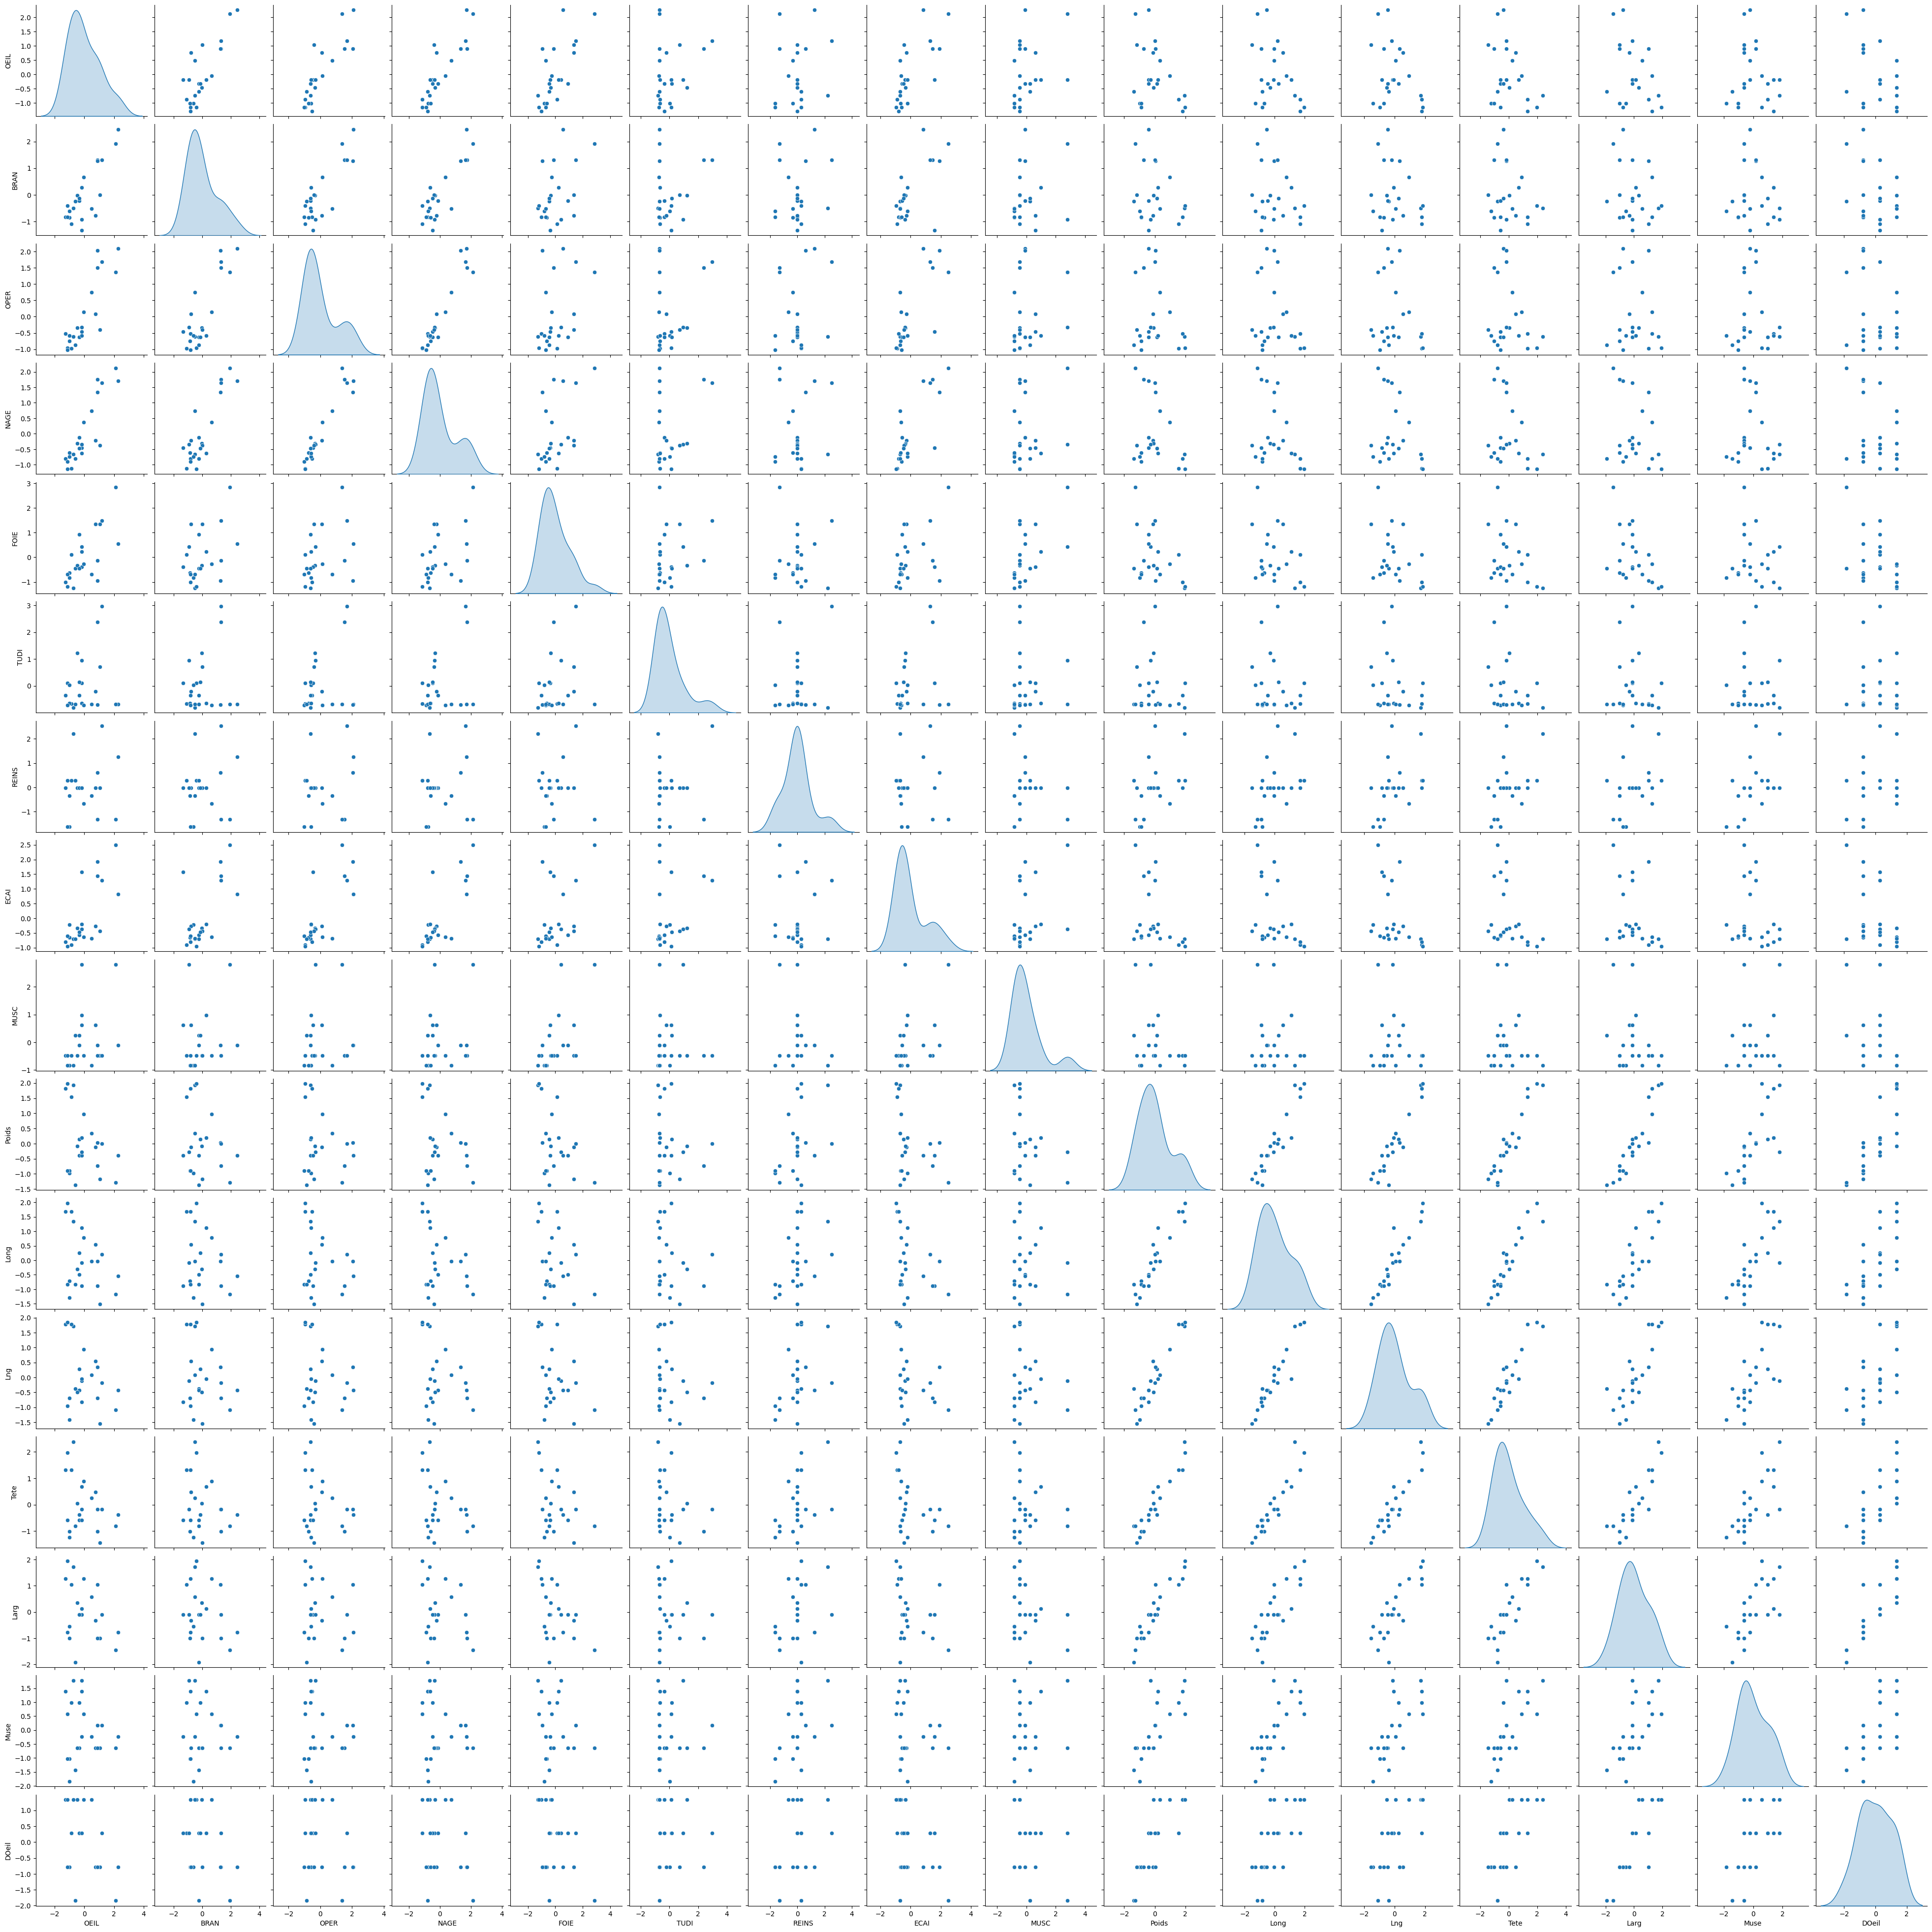

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()

# Centering and reducting numeric data
variables_to_scale = df.select_dtypes(include=['float', 'int']).columns
df_scaled[variables_to_scale] = scaler.fit_transform(df[variables_to_scale])

# Create a pairplot with seaborn on scaled data
sns.pairplot(df_scaled, diag_kind="kde")

## Traitement des données

### ACP

In [13]:
from sklearn.decomposition import PCA

# Réaliser l'ACP
pca = PCA()
components = pca.fit_transform(df_scaled.select_dtypes(include=['float', 'int']))

# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_

# Eigen value
vp = pca.explained_variance_

data_vp = []
variance_sum = 0

for i in range(len(vp)):
    variance_sum += explained_variance[i]
    data_vp.append([f"Comp {i+1}", vp[i], explained_variance[i]*100, variance_sum*100])

# Créer un DataFrame pandas
df_vp = pd.DataFrame(data_vp, columns=["Comp", "Eigenvalue", "Percentage of Variance", "Cumulative Variance"])

# Afficher le tableau
print(df_vp)

       Comp  Eigenvalue  Percentage of Variance  Cumulative Variance
0    Comp 1    7.864271               47.014663            47.014663
1    Comp 2    3.855936               23.051792            70.066455
2    Comp 3    1.468187                8.777206            78.843662
3    Comp 4    1.088303                6.506162            85.349824
4    Comp 5    0.755906                4.519004            89.868827
5    Comp 6    0.505994                3.024964            92.893791
6    Comp 7    0.373524                2.233026            95.126817
7    Comp 8    0.293356                1.753756            96.880574
8    Comp 9    0.164200                0.981628            97.862201
9   Comp 10    0.128576                0.768663            98.630864
10  Comp 11    0.072693                0.434575            99.065439
11  Comp 12    0.065351                0.390684            99.456123
12  Comp 13    0.041332                0.247094            99.703216
13  Comp 14    0.035627           

47% de la 1ère composante et 23% de la 2ème composante expliquent 70% de l'inertie totale. Si l'on regarde la valeur propre, il faut 2 composantes pour obtenir 70% de l'inertie totale.

### Graphique des vecteurs propres

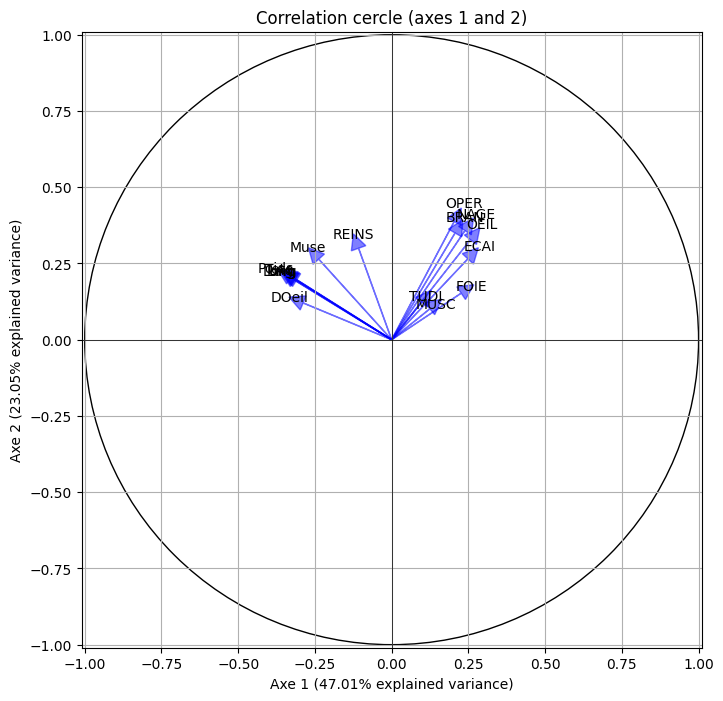

In [14]:
# Eigen vectors
components = pca.components_

# Plot
plt.figure(figsize=(8, 8))

# Pie chart
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_artist(circle)

# Abscissa and ordinate limits
plt.xlim(-1.01, 1.01)
plt.ylim(-1.01, 1.01)

# Drawing eigen vectors
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    plt.arrow(0, 0, x, y, color='b', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(x * 1.15, y * 1.15, df.columns[i], ha='center', va='center')

# Abscissa and ordinate labels
plt.xlabel(f'Axe 1 ({pca.explained_variance_ratio_[0]*100:.2f}% explained variance)')
plt.ylabel(f'Axe 2 ({pca.explained_variance_ratio_[1]*100:.2f}% explained variance)')

plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Correlation cercle (axes 1 and 2)")

# Plot display
plt.show()

**Rappel** :
- Les flèches proches du cercle indiquent que les variables sont bien représentées par les deux premières composantes principales.
- Les flèches perpendiculaires indiquent que les variables ne sont pas corrélées entre elles.
- Les flèches qui pointent dans la même direction indiquent une corrélation positive entre ces variables.
- Lorsque deux flèches pointent dans une direction similaire (proches l'une de l'autre), cela indique que les deux variables sont positivement corrélées.
- Si les flèches pointent dans des directions opposées (à environ 180 degrés l'une de l'autre), cela signifie que les deux variables sont fortement corrélées négativement. En d'autres termes, lorsque l'une des variables augmente, l'autre a tendance à diminuer.

**Explications** :
- OPER et NAGE sont positivement corrélés. Ainsi, lorsque OPER augmente, NAGE augmente également.
- Mais REINS et FOIE ne sont pas corrélés entre eux.

In [15]:
# Computing absolute contribution
contributions_abs = components**2

# Keep the 2-first contributions
contributions_pc1_pc2 = contributions_abs[:2, :]

# Computing relative contribution
contributions_pc1_relative = contributions_pc1_pc2[0] / contributions_pc1_pc2[0].sum() * 100
contributions_pc2_relative = contributions_pc1_pc2[1] / contributions_pc1_pc2[1].sum() * 100

# Creating a dataframe
df_contributions = pd.DataFrame({
    "Variable": variables_to_scale,
    "PC1 Relative Contribution (%)": contributions_pc1_relative,
    "PC2 Relative Contribution (%)": contributions_pc2_relative
})

print(df_contributions)

   Variable  PC1 Relative Contribution (%)  PC2 Relative Contribution (%)
0      OEIL                       6.584506                      10.752292
1      BRAN                       4.269432                      12.255132
2      OPER                       4.152913                      15.022110
3      NAGE                       5.701408                      12.801906
4      FOIE                       5.129849                       2.327672
5      TUDI                       0.955633                       1.514304
6     REINS                       1.160929                       8.996653
7      ECAI                       6.164318                       7.032766
8      MUSC                       1.548172                       1.027760
9     Poids                      10.834461                       4.175412
10     Long                      10.063533                       3.829962
11      Lng                       9.805456                       3.932740
12     Tete                      10.08

Le deuxième axe semble représenter la contamination radioactive, et le premier, la forme.

In [16]:
# Creating a dataframe with cos²
cos2_df = pd.DataFrame(contributions_abs.T, index=variables_to_scale, columns=[f'Axe {i+1}' for i in range(components.shape[0])])

# cos² display
print("Cos² pour chaque variable sur les composantes principales :")
print(cos2_df*100)

Cos² pour chaque variable sur les composantes principales :
           Axe 1      Axe 2      Axe 3      Axe 4      Axe 5      Axe 6  \
OEIL    6.584506  10.752292   0.248688   0.555907   1.738816   4.023135   
BRAN    4.269432  12.255132   1.701309   4.449965   0.210377   1.894370   
OPER    4.152913  15.022110   4.257690   2.468756   0.983765   0.299214   
NAGE    5.701408  12.801906   1.963809   1.366621   2.559151   0.902050   
FOIE    5.129849   2.327672  15.653907   5.106453   5.870053  34.793379   
TUDI    0.955633   1.514304   7.440412  65.312924   4.003785   0.260454   
REINS   1.160929   8.996653   1.185718   6.518195  54.203681  16.879876   
ECAI    6.164318   7.032766   0.000871   0.320277   8.588147  19.830281   
MUSC    1.548172   1.027760  52.042691   1.501794   5.169053   5.212108   
Poids  10.834461   4.175412   0.078831   0.236940   0.468996   1.019718   
Long   10.063533   3.829962   1.425501   0.148590   0.131915   1.748956   
Lng     9.805456   3.932740   0.513667  

/home/cytech/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


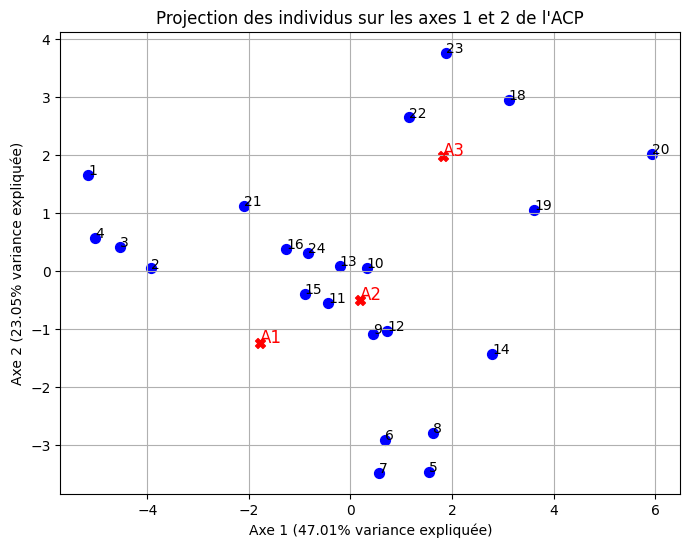

In [17]:
components = pca.fit_transform(df_scaled.select_dtypes(include=['float']))

# Points display on 2-first components
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c='blue', s=50)

# Adding name on points
for i, country in enumerate(df_scaled.index):
    plt.text(components[i, 0], components[i, 1], country)

plt.title('Projection des individus sur les axes 1 et 2 de l\'ACP')
plt.xlabel(f'Axe 1 ({explained_variance[0]*100:.2f}% variance expliquée)')
plt.ylabel(f'Axe 2 ({explained_variance[1]*100:.2f}% variance expliquée)')
plt.grid(True)

# Adding mean value for each AQUA modality
aqua_groups = df.groupby('AQUA').mean()

# Normalized new values
aqua_scaled = scaler.transform(aqua_groups)
aqua_components = pca.transform(aqua_scaled)

plt.scatter(aqua_components[:, 0], aqua_components[:, 1], c='red', s=50, marker='X')

for i, label in enumerate(aqua_groups.index):
    plt.text(aqua_components[i, 0], aqua_components[i, 1], label, fontsize=12, color='red')

# Plot display
plt.show()